# Check test img

test data 이미지를 확인해보자. 

bbox가 어떻게 생겼는지

In [33]:
# 라이브러리
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"]=10, 10

In [41]:
# data path 설정
test_path = '../data/train/'
img_list = os.listdir(test_path)
img_list.sort()
print(len(img_list))

txt_path = '../data/train_annotation.txt'

df = pd.read_csv(txt_path, header=None)
print(df.shape)

1625
(1625, 30)


In [42]:
img_list[0]

'5820554de4b0ced31a7fd174.jpg'

In [43]:
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,./data/train/5820554de4b0ced31a7fd174.jpg 8,143,98,233,1,198,141,288,231,2,...,94,700,148,754,5,155,699,211,755,6
1,./data/train/58205570e4b0bb347e7dec70.jpg 34,189,116,271,1,183,183,265,265,2,...,101,705,151,755,5,154,707,204,757,6
2,./data/train/582055c0e4b0ced31a7fd17e.jpg 0,129,96,227,1,182,131,272,221,2,...,78,740,136,798,5,142,741,196,795,6
3,./data/train/582055fbe4b0ced31a7fd180.jpg 41,130,117,206,1,206,124,288,206,2,...,106,675,154,723,5,166,672,214,720,6
4,./data/train/58205636e4b0ced31a7fd182.jpg 31,118,119,206,1,193,117,277,201,2,...,110,678,158,726,5,163,680,211,728,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,./data/train/5c8846cae4b01de6a1dbe53a.jpg 8,64,98,154,1,176,69,266,159,2,...,63,673,119,729,5,148,675,202,729,6
1621,./data/train/5c88508fe4b0b38c04b008a8.jpg 36,104,114,182,1,203,109,283,189,2,...,95,644,145,694,5,157,641,207,691,6
1622,./data/train/5c885284e4b01de6a1dbe768.jpg 19,110,103,194,1,175,114,257,196,2,...,90,639,140,689,5,139,645,189,695,6
1623,./data/train/5c886f6ae4b01de6a1dbf9f6.jpg 41,100,125,184,1,199,106,281,188,2,...,88,633,136,681,5,182,635,228,681,6


In [37]:
df.iloc[0]

0     ./data/test/5d097f47e4b05338ae1764e2.jpg 27
1                                             109
2                                             111
3                                             193
4                                               1
5                                             196
6                                             106
7                                             280
8                                             190
9                                               2
10                                             43
11                                            410
12                                            117
13                                            482
14                                              3
15                                            187
16                                            407
17                                            261
18                                            481
19                                              4


In [38]:
def ratio_multiply(num, ratio=1):
    return int(num*ratio)

# bounding box 좌표 변경하기
def cvt_coordinate(center_x, center_y, w, h, ratio=1):
    '''
    start_x, start_y: 시작 꼭짓점 좌표 (x, y)
    end_x, end_y: 종료 꼭짓점 좌표 (x, y)
    ratio: resize 비율
    '''
    start_x, end_x = center_x - (w//2), center_x + (w//2)
    start_y, end_y = center_y - (h//2), center_y + (h//2)
    
    start_x = ratio_multiply(start_x, ratio)
    start_y = ratio_multiply(start_y, ratio) 
    end_x = ratio_multiply(end_x, ratio)
    end_y = ratio_multiply(end_y, ratio)
    
    return start_x, start_y, end_x, end_y

In [39]:
idx= 0

shape: (750, 302, 3)


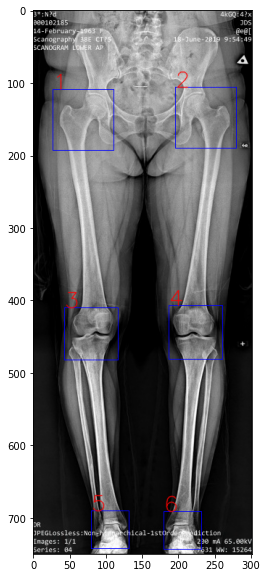

In [40]:
# show image with bbox and labels
img = cv2.imread(test_path + img_list[idx])
sr = df.iloc[idx]

# ratio = 0.1
# resized_img = cv2.resize(img, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)

# bounding box
for i in range(0, 30, 5):
    if i==0:
        title, start_x = sr[i].split(' ')
        start_x = int(start_x)
        start_y, end_x, end_y = int(sr[i+1]), int(sr[i+2]), int(sr[i+3])
    else:
        start_x, start_y, end_x, end_y = int(sr[i]), int(sr[i+1]), int(sr[i+2]), int(sr[i+3]) 
    label = int(sr[i+4])
    
    img = cv2.rectangle(img, (start_x, start_y), (end_x, end_y), (0, 0, 255), 1)
    cv2.putText(img, str(label), (start_x, start_y), cv2.FONT_ITALIC, 1, (255, 0, 0), 1, cv2.LINE_AA)
    
print("shape:", img.shape)
    
plt.imshow(img)
plt.show()